In [1]:
# Enable autoreload to automatically reload modules when they are updated
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from typing import Dict, Any, Optional, Union
import joblib
import psutil
import os
import numpy as np
from sarpyx.processor.core.focus import CoarseRDA
from sarpyx.utils.zarr_utils import ZarrManager

# Only add path if not already added
cwd = Path.cwd()
sarpyx_path = cwd.parent
if str(sarpyx_path) not in __import__('sys').path:
    __import__('sys').path.append(str(sarpyx_path))
    
# Create output directory for stepped processing results
output_dir = cwd.parent / 'focused_data' 
output_dir.mkdir(parents=True, exist_ok=True)
print(f'📁 Output directory: {output_dir}')

📁 Output directory: /Data_large/marine/PythonProjects/SAR/sarpyx/focused_data


In [4]:
file_path = "/Data_large/marine/PythonProjects/SAR/sarpyx/decoded_data/s1a-s1-raw-s-hh-20150519t121652-20150519t121725-005990-007b7d_burst_0.zarr"
handler = ZarrManager(file_path)
# raw_data = manager._export_raw()

SLICE_N = 1
N_SLICES = 5
raw_data = handler.get_slice_block(slice_idx=SLICE_N, N_blocks=N_SLICES)
print(f'📊 Sliced raw data shape: {raw_data["echo"].shape} ')

processor = CoarseRDA(
            raw_data=raw_data,
            verbose=False,
        )
print(f'🛠️ Processor initialized with raw data of shape: {raw_data["echo"].shape}')

📊 Sliced raw data shape: (12000, 25672) 
Elapsed time for _generate_tx_replica: 0.0010 seconds
🛠️ Processor initialized with raw data of shape: (12000, 25672)


#### Create tmp directory

In [5]:
random_idx = np.random.randint(0, 10e12)
print(f'🔢 Random index for processing: {random_idx}')
tmp_dir = output_dir / 'tmp' / str(random_idx)
# create temporary directory for processing
tmp_dir.mkdir(parents=True, exist_ok=True)
print(f'📂 Temporary directory created at: {tmp_dir}')

🔢 Random index for processing: 8216953460823
📂 Temporary directory created at: /Data_large/marine/PythonProjects/SAR/sarpyx/focused_data/tmp/8216953460823


In [6]:
processor.data_focus()

Elapsed time for fft2d: 22.7871 seconds
Elapsed time for get_range_filter: 0.0031 seconds
Debug: Attempting to multiply arrays with shapes (12000, 25672) and (25672,)
Debug: Broadcasting 1D array along range dimension (axis=1)
Debug: Broadcasting successful, result shape: (12000, 25672)
Elapsed time for range_compression: 1.0740 seconds
Elapsed time for ifft2d: 27.1139 seconds
Elapsed time for _compute_effective_velocities: 3.8026 seconds
Elapsed time for get_rcmc: 13.7188 seconds
Elapsed time for ifft_range: 21.4593 seconds
Elapsed time for rcmc: 37.4228 seconds
Elapsed time for get_azimuth_filter: 28.0544 seconds
Elapsed time for ifft_azimuth: 4.5981 seconds
Elapsed time for azimuth_compression: 34.0739 seconds
Elapsed time for data_focus: 129.4019 seconds


In [ ]:
joblib.dump(processor,
            tmp_dir / 'processor.lzma',
            compress=3,
        )

In [ ]:
# remove temporary directory after processing
if tmp.exists():
    for item in tmp.iterdir():
        item.unlink()
    tmp.rmdir()
    print(f'🗑️ Temporary directory {tmp} removed after processing.')

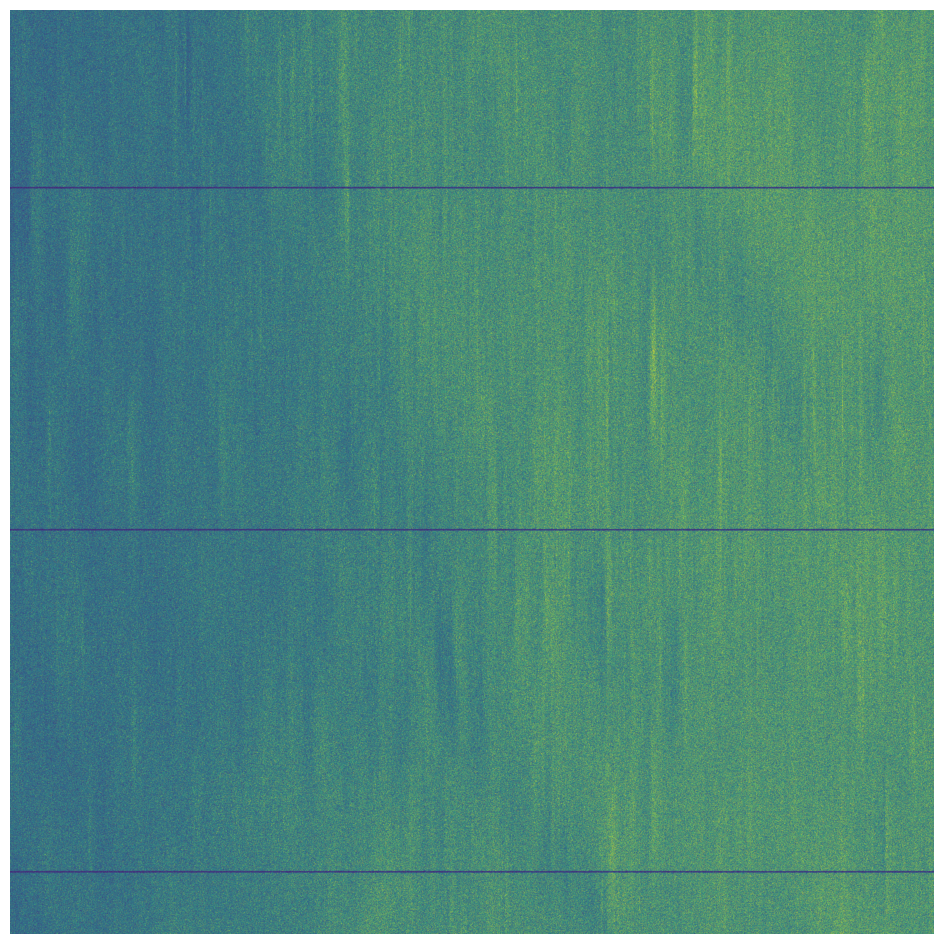

In [10]:
processor._display_slice(slice=(0,5000,0,5000), vmax=1200, step='rcmc')


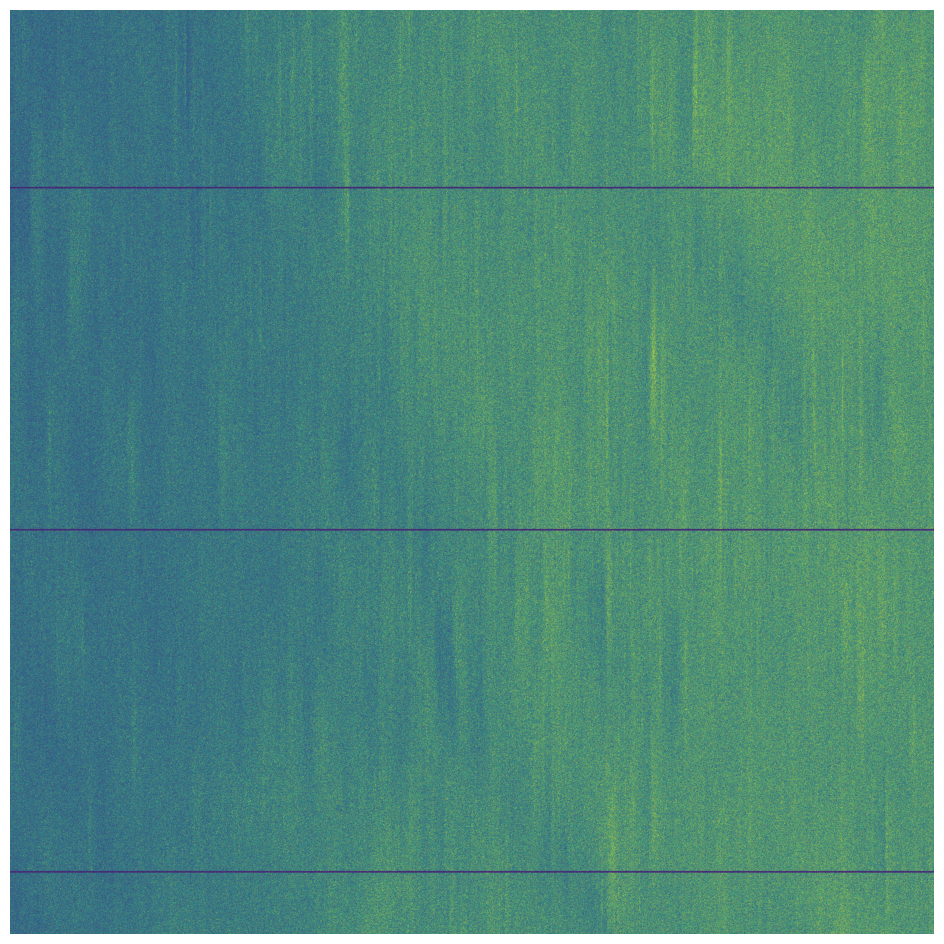

In [11]:
processor._display_slice(slice=(0,5000,0,5000), vmax=1200, step='range_compressed')


#### Focus and save in tmp